## Regression Model

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

np.random.seed(0)

In [3]:
# Import data set and view raw data
full_data = pd.read_csv("./cosmetics.csv")
full_data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Remove Outliers in Price Data
# Remove outliers
Q1 = np.percentile(full_data['Price'], 25, method='midpoint')
Q3 = np.percentile(full_data['Price'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (full_data['Price'] < lower_bound) | (full_data['Price'] > upper_bound)

# Remove outliers
cleaned_train_data = full_data[~outlier_indices]

In [5]:
# Remove Outliers in Rank Data
# Remove outliers
Q1 = np.percentile(full_data['Rank'], 25, method='midpoint')
Q3 = np.percentile(full_data['Rank'], 75, method='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_bound = Q3 + 1.5 * IQR
 
# Lower bound
lower_bound = Q1 - 1.5 * IQR

# Identify outlier rows
outlier_indices = (full_data['Rank'] < lower_bound) | (full_data['Rank'] > upper_bound)

# Remove outliers
cleaned_data = full_data[~outlier_indices]

In [6]:
print(len(cleaned_data))

1422


In [7]:
full_data = full_data.sample(frac = 1)
train_data = full_data[:1138]
test_data = full_data[1138:]

## Data Preprocessing

In [8]:
train_data.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1076,Face Mask,CLINIQUE,Pep-Start Double Bubble Purifying Mask,24,4.0,"Water , Disiloxane , Cocamidopropyl Betaine , ...",1,1,1,1,0
655,Treatment,CAUDALIE,Premier Cru Serum,150,4.1,"Polyphenols, Viniferine, Vine Resveratrol, Vin...",1,1,1,1,1
554,Cleanser,OLEHENRIKSEN,Wonderfeel™ Double Cleanser,32,4.4,"Water, Ethylhexyl Palmitate, Propanediol, Trie...",1,1,1,1,1
568,Cleanser,KIEHL'S SINCE 1851,Blue Herbal Acne Cleanser Treatment,22,3.5,"Water, Coco-Glucoside, Propylene Glycol, Ammon...",1,0,0,1,0
390,Cleanser,CLINIQUE,Clarifying Lotion 3,16,4.4,"Water , Alcohol Denat. , Salicylic Acid , Hama...",0,0,0,0,0


In [9]:
test_data.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
59,Moisturizer,TATCHA,The Silk Cream,120,4.3,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,1,1,0,1
1118,Eye cream,CLARINS,Super Restorative Total Eye Concentrate,85,4.2,"Water, Glycerin, Caprylic/Capric Triglyceride,...",1,1,1,1,1
1373,Sun protect,AMOREPACIFIC,Natural Protector Broad Spectrum SPF 35 Sunscreen,65,4.0,Visit the AMOREPACIFIC boutique,1,1,1,1,1
1419,Sun protect,SKIN LAUNDRY,Daily Moisturizer Broad Spectrum SPF 35,25,4.1,"Acrylates/C10-30 Alkyl Acrylate Crosspolymer, ...",1,1,1,1,1
449,Cleanser,ORIGINS,Zero Oil™ Deep Pore Cleanser,23,4.2,"Water; Salvia Officinalis (Sage) Leaf Water, C...",0,0,0,0,0


In [10]:
# Filter test and train data for variables used for feature selection
features_train = ['Label', 'Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
#features_test = ['Label', 'Price', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

train_data = train_data[features_train]
#filtered_test_data = full_test_data[features_test]

In [11]:
# Convert categorical features to 0-1 indicator variables
train_data = pd.get_dummies(
    train_data,
    columns = ['Label'],
    dtype = int,
    drop_first = True
)

# filtered_test_data = pd.get_dummies(
#     filtered_test_data, 
#     columns = ['Label'],
#     dtype = int,
#     drop_first = True
# )

X = train_data.drop('Price', axis = 1)
y = train_data.Price

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1138, 11)
Shape of y:  (1138,)


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Sample data (replace this with your actual target values)
y_true = y  # Actual target values

# Calculate the mean of the target variable
y_mean = np.mean(y_true)

# Create baseline predictions (mean prediction for all instances)
y_pred_baseline = np.full_like(y_true, y_mean)

# Calculate the baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_true, y_pred_baseline))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 47.28939064406327


In [158]:
from sklearn.model_selection import train_test_split

# Create out-of-sample test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

print("Train: ", X_train)
print("Test: ", X_test)

Train:        Rank  Combination  Dry  Normal  Oily  Sensitive  Label_Eye cream  \
230    4.2            1    1       1     1          1                0   
1256   3.6            0    0       0     0          0                1   
540    4.9            1    1       1     1          1                0   
1463   4.2            0    0       0     0          0                0   
722    3.3            1    0       0     1          0                0   
...    ...          ...  ...     ...   ...        ...              ...   
1173   3.8            1    1       1     1          1                1   
118    4.3            0    0       0     0          0                0   
1199   4.0            1    1       1     1          1                1   
1083   3.8            1    1       1     1          1                0   
457    4.2            1    1       1     1          1                0   

      Label_Face Mask  Label_Moisturizer  Label_Sun protect  Label_Treatment  
230                 0   

In [159]:
print("Columns: ", X_train.columns)

Columns:  Index(['Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive',
       'Label_Eye cream', 'Label_Face Mask', 'Label_Moisturizer',
       'Label_Sun protect', 'Label_Treatment'],
      dtype='object')


## Ridge Regression

In [160]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data in training and test sets for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    shuffle = True, random_state = 0)

# Find the best alpha, regularization parameter
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = 5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print("Best value of regularization parameter (alpha):", best_alpha)

# Ridge Regression using best alpha
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(X_train, y_train)

#Predictions on train set
preds_y_train = ridge_model.predict(X_train)

# Compute RMSE on train set
rmse_train = np.sqrt(np.mean((preds_y_train - y_train)**2))
print("RMSE on train set (Ridge Regression):", rmse_train)

# Predictions on test set
preds_y_test = ridge_model.predict(X_test)

# Compute RMSE on test set
rmse_test = np.sqrt(np.mean((preds_y_test - y_test)**2))
print("RMSE on test set (Ridge Regression):", rmse_test)

Best value of regularization parameter (alpha): 2.848035868435802
RMSE on train set (Ridge Regression): 42.837098070944556
RMSE on test set (Ridge Regression): 45.454657165586454


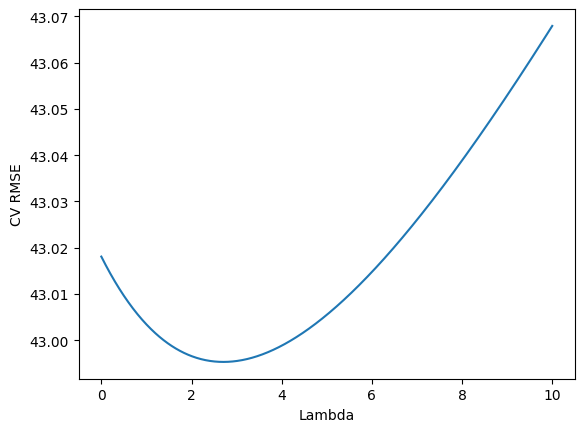

Best Lambda:  2.7027027027027026 

Val RMSE:  38.28713239183239
Train RMSE:  43.340060954002624 

Val RMSE:  59.15385198213316
Train RMSE:  40.69501624296902 

Val RMSE:  39.639499413270734
Train RMSE:  43.251715097077565 

Val RMSE:  52.044493706990586
Train RMSE:  41.79885520768387 

Val RMSE:  45.55922984560411
Train RMSE:  42.56002720878362 

Val RMSE:  42.16937460000164
Train RMSE:  42.947066072575524 

Val RMSE:  36.012085577694876
Train RMSE:  43.56395265565798 

Val RMSE:  34.9983388395593
Train RMSE:  43.64728674334845 

Val RMSE:  46.431073574928796
Train RMSE:  42.48332176809076 

Val RMSE:  35.65802872176874
Train RMSE:  43.56592971114422 



In [161]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def rmse(y, y_hat):
    return sqrt(mean_squared_error(y, y_hat))

# Create parameter range to test
lambdas = np.linspace(0.0, 10.0, 1000)
cv = KFold(n_splits = 10)

# Used for k-fold splitting
X_fold = X_train.to_numpy()
y_fold = y_train.to_numpy()

# Use cross_val_score method to plot average RMSE across lambda parameters
rmse_scores = []
for l in lambdas:
    model = Ridge(alpha = l)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_root_mean_squared_error")
    rmse_scores.append(scores.mean())

rmses = [-x for x in rmse_scores]
plt.plot(lambdas, rmses)
plt.xlabel('Lambda')
plt.ylabel('CV RMSE')
plt.show()

best_lambda = lambdas[rmses.index(min(rmses))]
print("Best Lambda: ", best_lambda, "\n")

# Perform k-fold validation and report minimum RMSE for test and corresponding train set
for train_index, test_index in cv.split(X_train, y_train):

    rmses_train = []
    rmses_val = []

    X_train2, X_test2, y_train2, y_test2 = X_fold[train_index], X_fold[test_index], y_fold[train_index], y_fold[test_index]

    # Compute rmse_train and rmse_test for ridge regression using best model
    model = Ridge(alpha = best_lambda)
    model.fit(X_train2, y_train2)

    predictions_train = model.predict(X_train2)
    predictions_val = model.predict(X_test2)

    rmse_train = rmse(y_train2, predictions_train)
    rmse_val = rmse(y_test2, predictions_val)

    print("Val RMSE: ", rmse_val)
    print("Train RMSE: ", rmse_train, "\n")


## KNN Regression

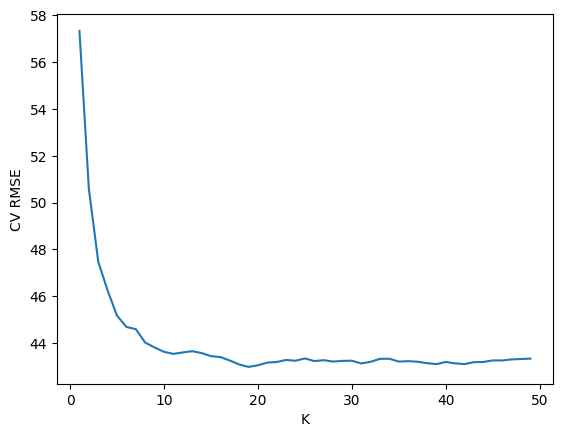

Best K:  19 

Val RMSE:  34.881905246534345
Train RMSE:  42.32111447359647 

Val RMSE:  59.12021285267226
Train RMSE:  39.65863690188449 

Val RMSE:  42.326992810928886
Train RMSE:  41.81342793579901 

Val RMSE:  52.42541054214371
Train RMSE:  40.49852552054612 

Val RMSE:  45.21488945833794
Train RMSE:  41.44742086184884 

Val RMSE:  43.59042208173031
Train RMSE:  41.54808118638876 

Val RMSE:  35.75060063552411
Train RMSE:  42.227974341164526 

Val RMSE:  33.677499873764454
Train RMSE:  42.327385518077186 

Val RMSE:  47.52328934369703
Train RMSE:  40.83274155174181 

Val RMSE:  35.345122407493086
Train RMSE:  42.24118592556464 



In [162]:
from sklearn.neighbors import KNeighborsRegressor

neighbors = [x for x in range (1, 50)]
cv = KFold(n_splits = 10)

X = X_train.to_numpy()
y = y_train.to_numpy()

# use cross_val_score method to plot average RMSE across k parameters
rmse_scores = []
for k in neighbors:
    model = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_root_mean_squared_error")
    rmse_scores.append(scores.mean())

rmses = [-x for x in rmse_scores]
plt.plot(neighbors, rmses)
plt.xlabel('K')
plt.ylabel('CV RMSE')
plt.show()

best_k = neighbors[rmses.index(min(rmses))]
print("Best K: ", best_k, "\n")

for train_index, test_index in cv.split(X_train, y_train):

    rmses_train = []
    rmses_test = []

    X_train2, X_test2, y_train2, y_test2 = X[train_index], X[test_index], y[train_index], y[test_index]

    # Compute rmse_train and rmse_test for knn using k as the neighbors parameter
    model = KNeighborsRegressor(n_neighbors = best_k)
    model.fit(X_train2, y_train2)

    predictions_train = model.predict(X_train2)
    predictions_val = model.predict(X_test2)

    rmse_train = rmse(y_train2, predictions_train)
    rmse_val = rmse(y_test2, predictions_val)

    print("Val RMSE: ", rmse_val)
    print("Train RMSE: ", rmse_train, "\n")

In [163]:
# Use best lambda for ridge model
model = Ridge(alpha = best_lambda)
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
# print("Predictions for test data using Ridge Regression: ", predictions_test)

rmse_train = rmse(y_train, predictions_train)
rmse_test = rmse(y_test, predictions_test)

print("Ridge Train RMSE: ", rmse_train)
print("Ridge Test RMSE: ", rmse_test)


# Use best k for KNN model
model = KNeighborsRegressor(n_neighbors = best_k)
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
# print("Predictions for test data using KNN Regression: ", predictions_test)

rmse_train = rmse(y_train, predictions_train)
rmse_test = rmse(y_test, predictions_test)

print("KNN Train RMSE: ", rmse_train)
print("KNN Test RMSE: ", rmse_test)

Ridge Train RMSE:  42.835405330414346
Ridge Test RMSE:  45.453556178287165
KNN Train RMSE:  41.70245903962498
KNN Test RMSE:  46.37542617160041
